<a href="https://colab.research.google.com/github/EgorPetko/ai_intro/blob/main/ai_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("student_data.csv", sep=',')
nameY = "G3"

for name in data:
  if(data[name].dtypes == data[nameY].dtypes) : continue
  map = dict()
  sh = 0
  for to in data[name]:
    if(to in map) : continue
    map[to] = sh
    sh += 1
  data[name].replace(map, inplace=True)

X = data

Y = X[nameY]
del X[nameY]
X = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)


<ipython-input-1-167a3926130e>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[name].replace(map, inplace=True)
<ipython-input-1-167a3926130e>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[name].replace(map, inplace=True)


In [ ]:
#2
#Задача регрессии

In [2]:
#3
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=17)
#print(x_train)


In [3]:
#4
import pandas as pd
import torch
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

testLoader = DataLoader(TensorDataset(torch.tensor(x_test.values,dtype=torch.float32),torch.tensor(y_test.values,dtype=torch.float32)), batch_size=16, shuffle=True)
trainLoader = DataLoader(TensorDataset(torch.tensor(x_train.values,dtype=torch.float32),torch.tensor(y_train.values,dtype=torch.float32)), batch_size=16, shuffle=True)



Using cpu device
Epoch 1

loss: 101.573013  [    0/  276] 12.890214920043945
loss: 130.709824  [   64/  276] 13.909977912902832
loss: 129.626175  [  128/  276] 0.16253511607646942
loss: 137.217575  [  192/  276] 15.082700729370117
loss: 123.352341  [  256/  276] 11.011065483093262
Avg loss:  129.43912601470947
Epoch 2

loss: 134.340454  [    0/  276] 10.314911842346191
loss: 132.477982  [   64/  276] 7.858821868896484
loss: 109.088287  [  128/  276] 10.18109130859375
loss: 140.349121  [  192/  276] 7.915267467498779
loss: 142.783630  [  256/  276] 9.874096870422363
Avg loss:  127.24154949188232
Epoch 3

loss: 184.128571  [    0/  276] 14.55998706817627
loss: 126.434448  [   64/  276] 4.975510120391846
loss: 84.246117  [  128/  276] 9.81999683380127
loss: 114.911148  [  192/  276] 10.677282333374023
loss: 104.757881  [  256/  276] 9.535284042358398
Avg loss:  122.10149765014648
Epoch 4

loss: 96.337906  [    0/  276] 7.903328895568848
loss: 116.744400  [   64/  276] 7.558624267578125
lo

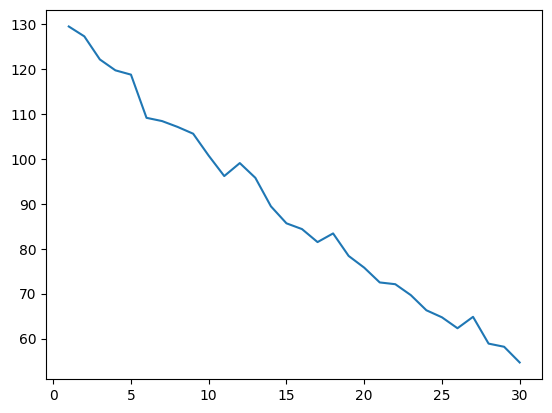

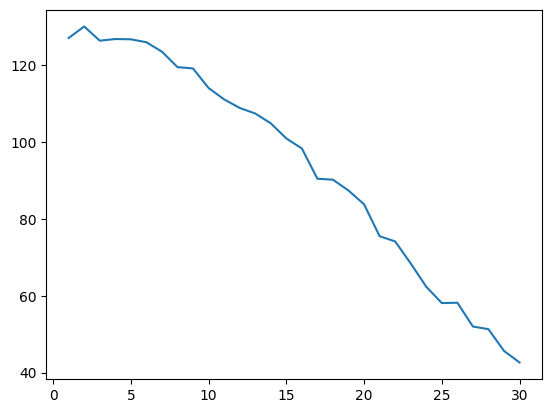

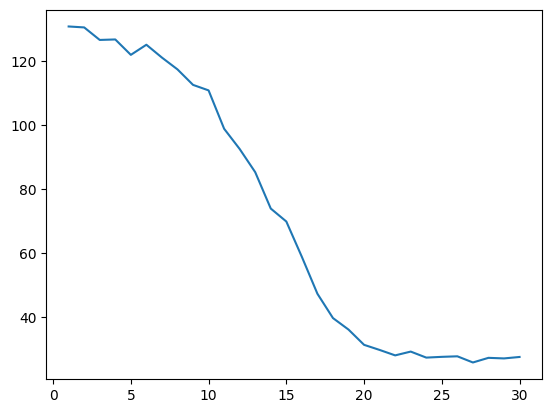

In [11]:
#5 - 6
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

class RegressionModel(nn.Module):
    def __init__(self, input_size, output_size,layer_sizes=[64], activation_fn=F.relu):
        super(RegressionModel, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.layer_sizes = layer_sizes
        self.activation_fn = activation_fn
        self.layers = nn.ModuleList()
        prev_size = input_size
        for size in layer_sizes:
            self.layers.append(nn.Linear(prev_size, size))
            prev_size = size
        self.layers.append(nn.Linear(prev_size, output_size))
        self.activation_fn = activation_fn

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.activation_fn(layer(x))
        x = self.layers[-1](x)
        return x

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 4 == 0:
            a = abs(pred - y).tolist()
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]", a[0][0])


def test_loop(dataloader, model, loss_fn):
    test_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    test_loss /= len(dataloader)
    print("Avg loss: " ,test_loss)
    return test_loss

model1 = RegressionModel(32,1,[64])
model2 = RegressionModel(32,1,[64,64])
model3 = RegressionModel(32,1,[64,64,64])
learning_rate = 1e-4
loss_fn = torch.nn.MSELoss()
optimizer1= torch.optim.SGD(model1.parameters(), lr=learning_rate)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=learning_rate)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=learning_rate)
epochs = 30
x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
for t in range(epochs):
    print(f"Epoch {t+1}\n")
    train_loop(trainLoader, model1, loss_fn, optimizer1)
    lost = test_loop(testLoader, model1, loss_fn)
    x1.append(t+1)
    y1.append(lost)




for t in range(epochs):
    print(f"Epoch {t+1}\n")
    train_loop(trainLoader, model2, loss_fn, optimizer2)
    lost = test_loop(testLoader, model2, loss_fn)
    x2.append(t+1)
    y2.append(lost)


for t in range(epochs):
    print(f"Epoch {t+1}\n")
    train_loop(trainLoader, model3, loss_fn, optimizer3)
    lost = test_loop(testLoader, model3, loss_fn)
    x3.append(t+1)
    y3.append(lost)
plt.plot(x1,y1)
plt.show()
plt.plot(x2,y2)
plt.show()
plt.plot(x3,y3)
plt.show()


In [8]:
#7

from sklearn.metrics import mean_absolute_error
def FF(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  return round(mae,2)

def loop(dataloader, model):
    y1 = []
    y2 = []
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        y1.append(round(pred.tolist()[0][0],1))
        y2.append(round(y.tolist()[0],1))
    return (y2,y1)

(y1,y2) = loop(trainLoader, model1)
print(FF(y1,y2))
(y1,y2) = loop(testLoader, model1)
print(FF(y1,y2))
print()
(y1,y2) = loop(trainLoader, model2)
print(FF(y1,y2))
(y1,y2) = loop(testLoader, model2)
print(FF(y1,y2))
print()
(y1,y2) = loop(trainLoader, model3)
print(FF(y1,y2))
(y1,y2) = loop(testLoader, model3)
print(FF(y1,y2))



6.6
7.26

4.88
4.55

3.71
5.19
